In [1]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 57.5 MB/s eta 0:00:00


### **Do not forget to connect to GPU runtime before training**

In [11]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [12]:
X_train.shape

(35000, 32, 32, 3)

In [13]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [14]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [15]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [16]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [28]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]


Answer:
Batch normalization is a technique used in deep neural networks to improve the training and performance of the model. It addresses the problem of internal covariate shift and helps stabilize and speed up the training process. Internal covariate shift refers to the change in the distribution of the input to each layer of the neural network during training.

The main idea behind batch normalization is to normalize the inputs to a layer by subtracting the batch mean and dividing by the batch standard deviation. This normalization is applied independently to each dimension or feature in the input. The normalization is performed for each mini-batch during training, hence the name "batch" normalization.

Batch normalization has several benefits. First, it helps alleviate the internal covariate shift problem. By normalizing the inputs, it reduces the amount of change in the distribution of inputs to each layer, making the training process more stable. This, in turn, allows the use of higher learning rates, which accelerates convergence and speeds up training.

Second, batch normalization acts as a regularizer. It introduces some noise to the network during training by adding small amounts of randomness due to the normalization process. This noise acts as a form of regularization and helps prevent overfitting, improving the generalization performance of the model.

Third, batch normalization reduces the dependence of the network on the initialization of the weights. It reduces the sensitivity of the network to the choice of initial weights, making it easier to train deep networks. This is particularly important in deep neural networks where the gradients can vanish or explode as they propagate through multiple layers.

Furthermore, batch normalization has the advantage of allowing higher learning rates, which can lead to faster convergence. It also helps combat the vanishing gradient problem by ensuring that the inputs to each layer have a reasonable range of values. This can lead to more stable gradients and better overall training.

To fix the internal covariate shift problem, batch normalization computes the mean and standard deviation of each feature dimension within a mini-batch. These statistics are then used to normalize the inputs by subtracting the mean and dividing by the standard deviation. The normalization is applied element-wise, independently for each feature dimension.

During inference or testing, batch normalization uses the population statistics (accumulated mean and standard deviation over the entire training set) instead of batch statistics. This allows the model to generalize well to unseen data by ensuring consistent normalization.

In summary, batch normalization is a technique used in deep neural networks to address the internal covariate shift problem. It normalizes the inputs to each layer by subtracting the batch mean and dividing by the batch standard deviation. Batch normalization improves training stability, allows higher learning rates, acts as a regularizer, reduces dependence on weight initialization, and speeds up convergence. It has become a standard component in modern deep learning architectures and has significantly contributed to the success of deep neural networks in various domains.
source- chatgpt, google
"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the\nproblem it is used for? [ Answer in atleast 300 words]\n\n\nAnswer:\nBatch normalization is a technique used in deep neural networks to improve the training and performance of the model. It addresses the problem of internal covariate shift and helps stabilize and speed up the training process. Internal covariate shift refers to the change in the distribution of the input to each layer of the neural network during training.\n\nThe main idea behind batch normalization is to normalize the inputs to a layer by subtracting the batch mean and dividing by the batch standard deviation. This normalization is applied independently to each dimension or feature in the input. The normalization is performed for each mini-batch during training, hence the name "batch" normalization.\n\nBatch normalization has several benefits. First, it helps alleviate the internal covariate shift problem. By normalizing the inputs, it 

In [36]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [37]:
# model initialization
model1 = tf.keras.Sequential()

# Intermediate layers
#model1.add(tf.keras.layers.Rescaling(1./255, input_shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(12, (3,3), activation = 'relu', input_shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.MaxPooling2D((3,3)))
model1.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(128, activation='relu'))

# final layer
model1.add(tf.keras.layers.Dense(10, activation='tanh'))

In [39]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 12)        336       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        1744      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 32)          4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 32)          9248      
                                                      

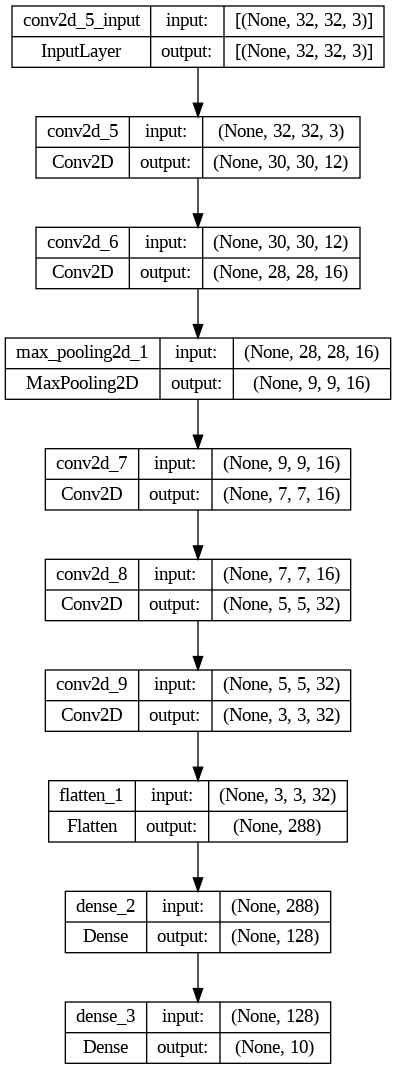

In [43]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)


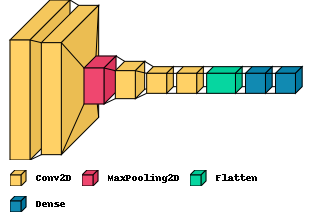

In [46]:
# just run this cell as it is
visualkeras.layered_view(model1, legend=True)


In [47]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [57]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model1.fit(augmented_images, epochs=10,validation_data = validation_data)

RuntimeError: ignored

In [53]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

NameError: ignored

In [56]:
model1.evaluate(X_test,Y_test)

RuntimeError: ignored

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**